<a href="https://colab.research.google.com/github/dwibagusd/dsa-compfest17/blob/main/StackAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [23]:
train = pd.read_csv('https://raw.githubusercontent.com/talitharhmd/Data-Science-Academy-2025/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/talitharhmd/Data-Science-Academy-2025/main/test.csv')


In [24]:
train

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,cluster_4_2021-12-30,2021-12-30,cluster_4,994.158,14.9,7.7,15.6,6.2,16136.066667,30666.253333,22.8,42.8,263.384394,3.563333,0.590000
11684,cluster_1_2021-12-31,2021-12-31,cluster_1,354.565,14.7,7.7,13.4,5.2,19148.153333,29727.200000,20.7,37.4,201.332279,3.510000,0.513333
11685,cluster_2_2021-12-31,2021-12-31,cluster_2,507.510,16.2,7.0,16.3,4.5,20570.920000,30594.280000,23.3,40.7,186.250597,5.006667,0.733333
11686,cluster_3_2021-12-31,2021-12-31,cluster_3,705.999,15.9,5.9,15.9,3.2,26860.350000,31496.173333,15.1,27.7,196.223902,5.783333,0.720000


# Overview Dataset

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3400 non-null   object 
 1   date                         3400 non-null   object 
 2   cluster_id                   3400 non-null   object 
 3   temperature_2m_max           3400 non-null   float64
 4   temperature_2m_min           3400 non-null   float64
 5   apparent_temperature_max     3400 non-null   float64
 6   apparent_temperature_min     3400 non-null   float64
 7   sunshine_duration            3400 non-null   float64
 8   daylight_duration            3400 non-null   float64
 9   wind_speed_10m_max           3400 non-null   float64
 10  wind_gusts_10m_max           3400 non-null   float64
 11  wind_direction_10m_dominant  3400 non-null   float64
 12  shortwave_radiation_sum      3400 non-null   float64
 13  et0_fao_evapotrans

In [27]:
train.isnull().sum()

,0
ID,0
date,0
cluster_id,0
electricity_consumption,0
temperature_2m_max,0
temperature_2m_min,0
apparent_temperature_max,0
apparent_temperature_min,0
sunshine_duration,0
daylight_duration,0


# 02 EDA

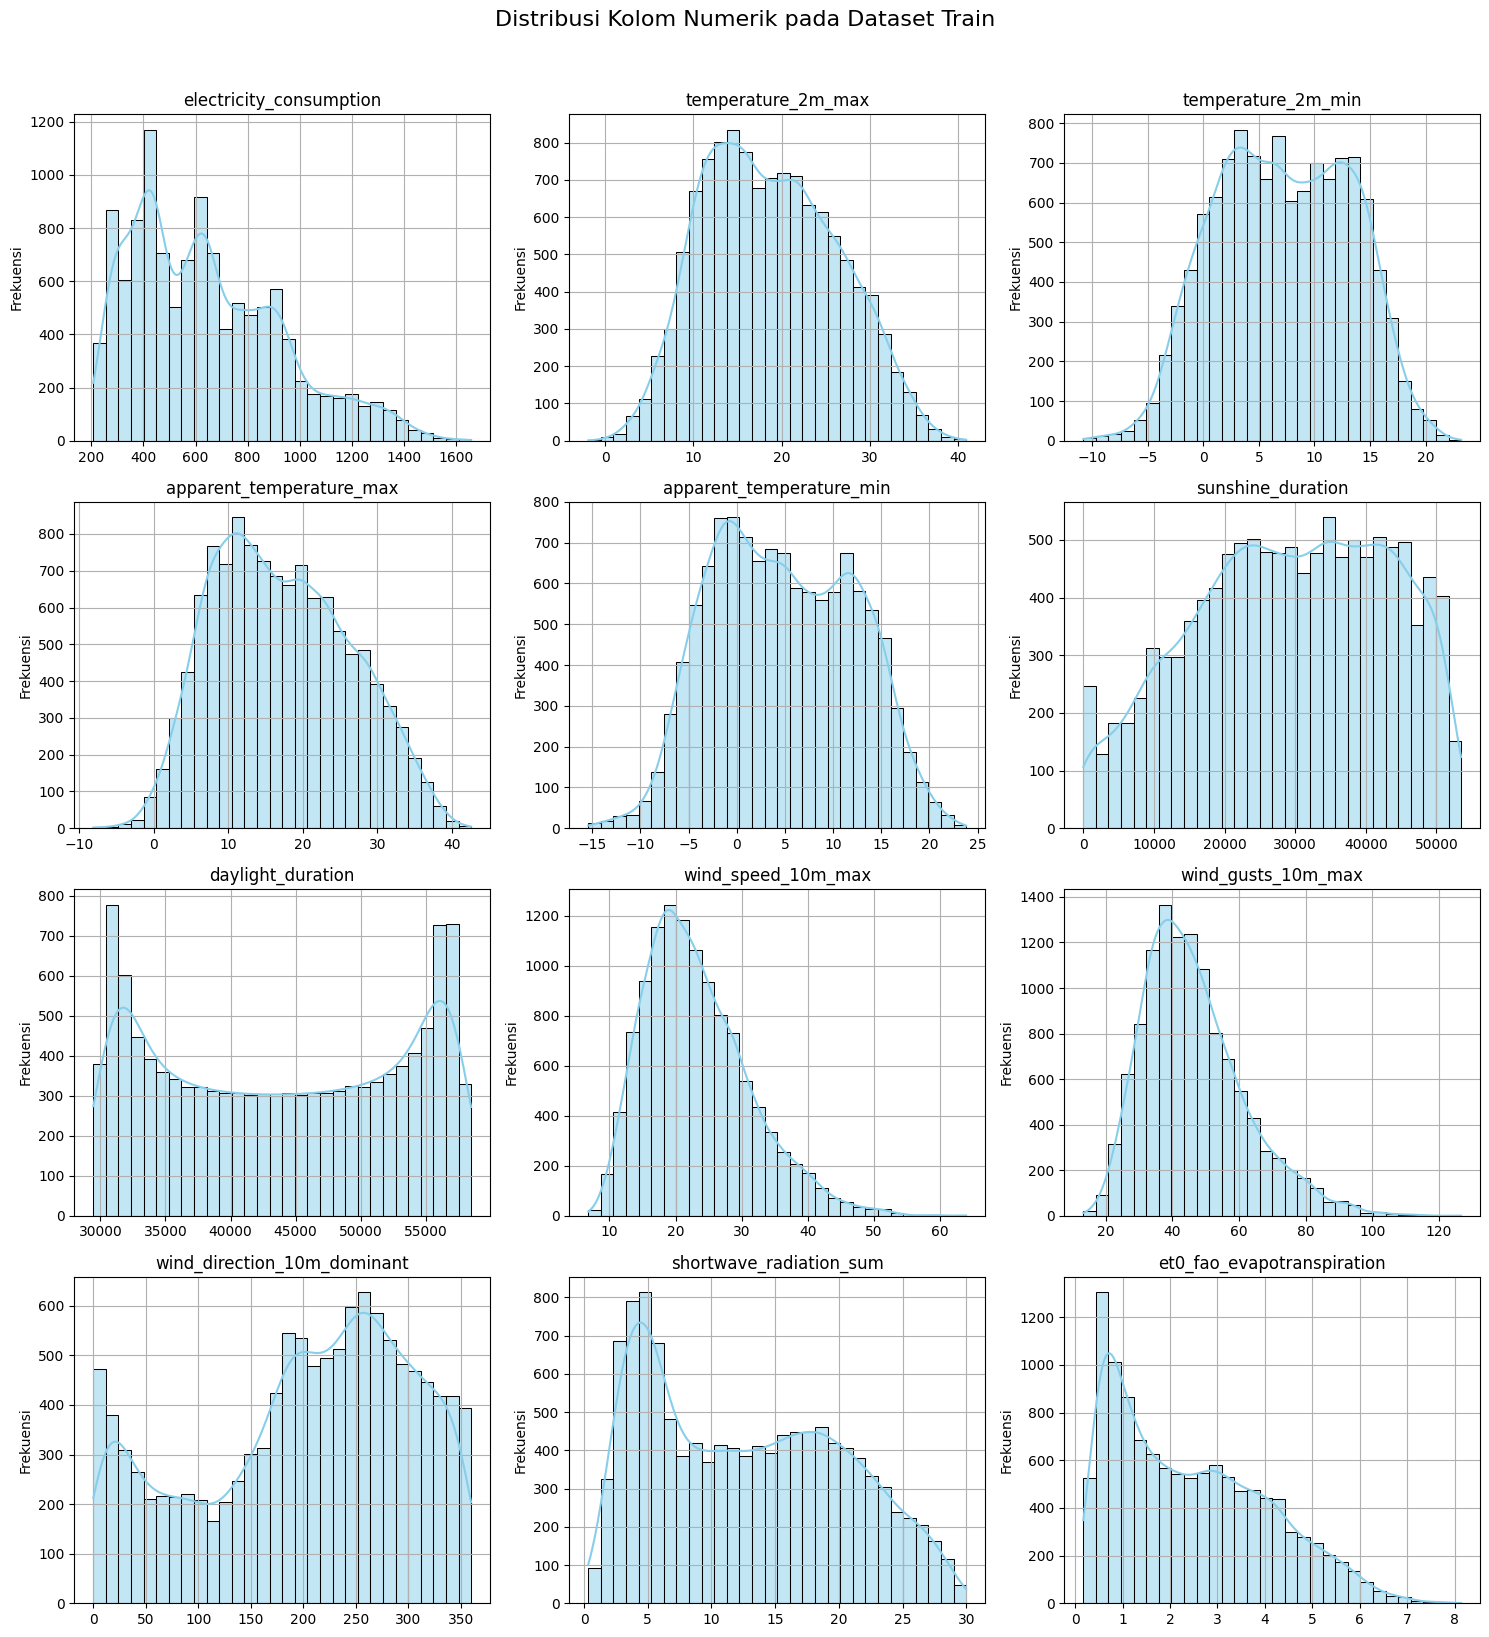

In [28]:
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle('Distribusi Kolom Numerik pada Dataset Train', fontsize=16, y=1.02)

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(train[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frekuensi')
    plt.grid(True)

plt.tight_layout()
plt.show()

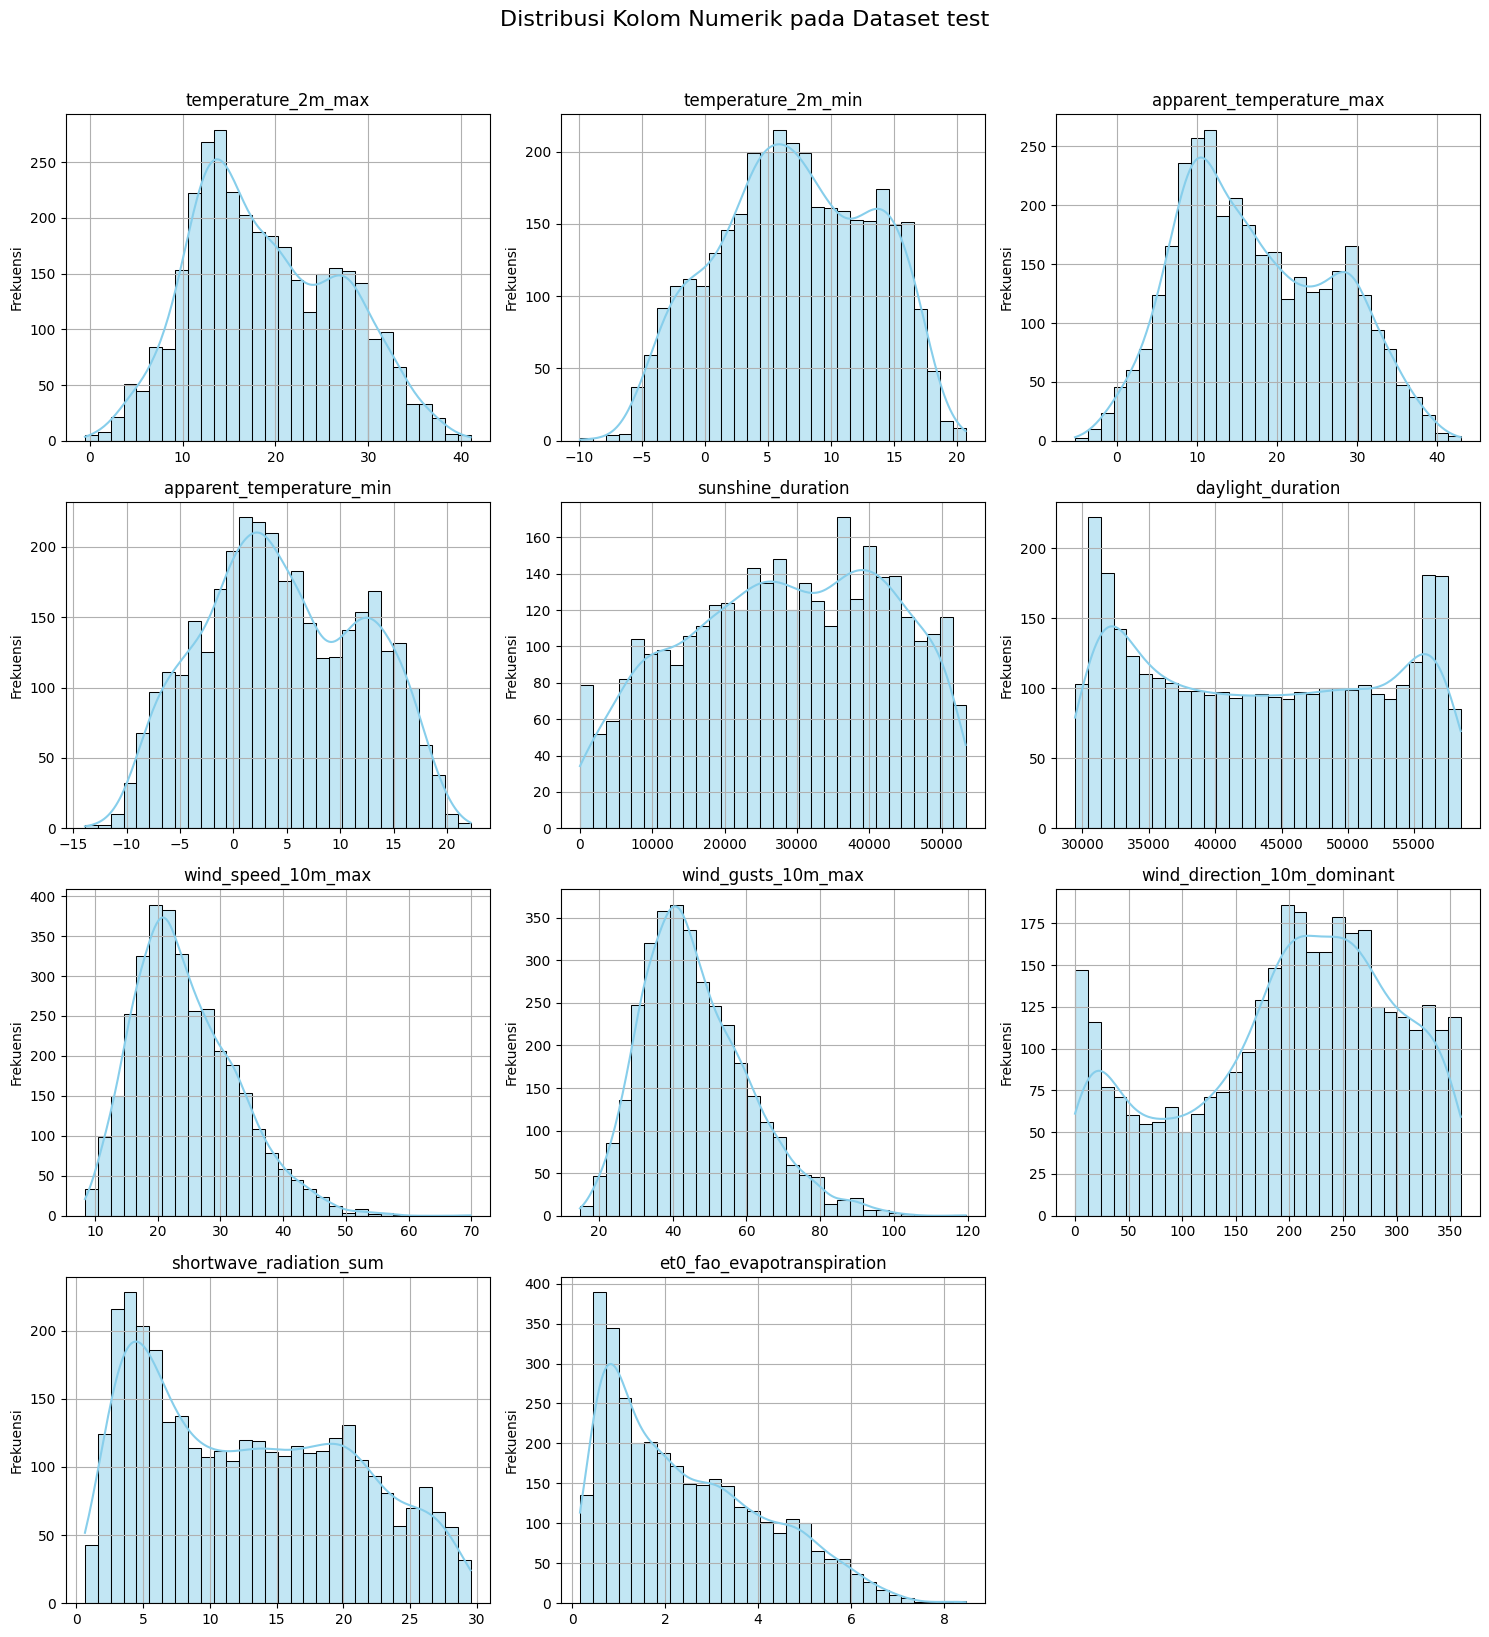

In [29]:
numeric_cols = test.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle('Distribusi Kolom Numerik pada Dataset test', fontsize=16, y=1.02)

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(test[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frekuensi')
    plt.grid(True)

plt.tight_layout()
plt.show()

# 03 Pre-Processing

In [30]:
# Konversi kolom 'date' menjadi datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [31]:
# Buat Fitur
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['dayofweek'] = train['date'].dt.dayofweek
train['is_weekend'] = train['dayofweek'].isin([5, 6]).astype(int)


test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['dayofweek'] = test['date'].dt.dayofweek
test['is_weekend'] = test['dayofweek'].isin([5, 6]).astype(int)

In [32]:
# --- Kolom dengan distribusi miring (skewed)
skewed_cols = [
    'sunshine_duration',
    'daylight_duration',
    'shortwave_radiation_sum',
    'et0_fao_evapotranspiration'
]

# --- Kolom dengan distribusi simetris/normal
normal_cols = [
    'temperature_2m_max',
    'temperature_2m_min',
    'apparent_temperature_max',
    'apparent_temperature_min',
    'wind_speed_10m_max',
    'wind_gusts_10m_max'
]

scaler_normal = StandardScaler()
scaler_skewed = StandardScaler()
yeo = PowerTransformer(method='yeo-johnson')

# --- Transformasi: Normal
X_train_normal = scaler_normal.fit_transform(train[normal_cols])
X_test_normal = scaler_normal.transform(test[normal_cols])

# --- Transformasi: Skewed
X_train_skewed = yeo.fit_transform(train[skewed_cols])
X_train_skewed = scaler_skewed.fit_transform(X_train_skewed)

X_test_skewed = yeo.transform(test[skewed_cols])
X_test_skewed = scaler_skewed.transform(X_test_skewed)

train_transformed = pd.DataFrame(
    np.concatenate([X_train_normal, X_train_skewed], axis=1),
    columns=normal_cols + skewed_cols
)

test_transformed = pd.DataFrame(
    np.concatenate([X_test_normal, X_test_skewed], axis=1),
    columns=normal_cols + skewed_cols
)

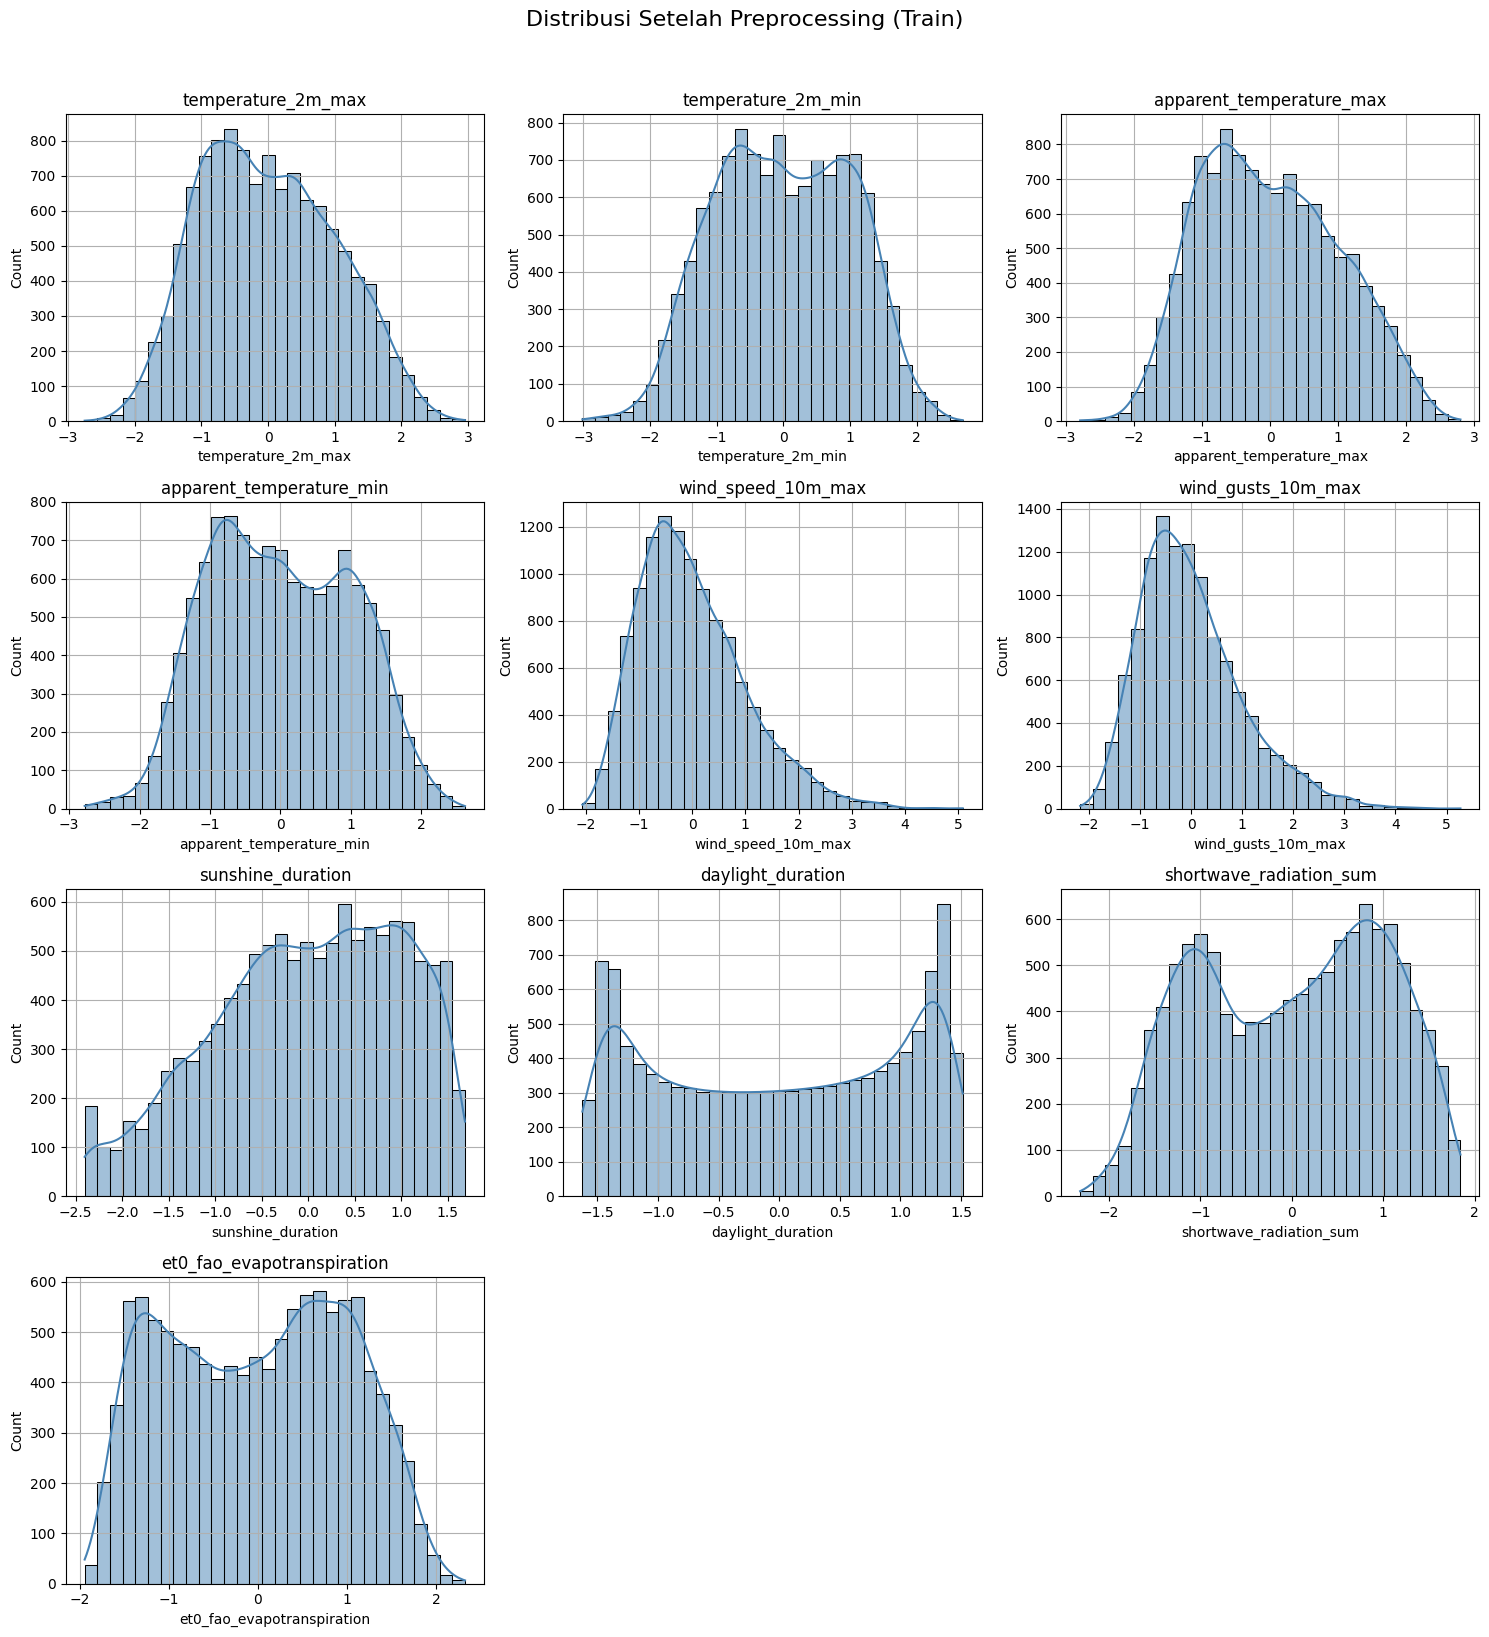

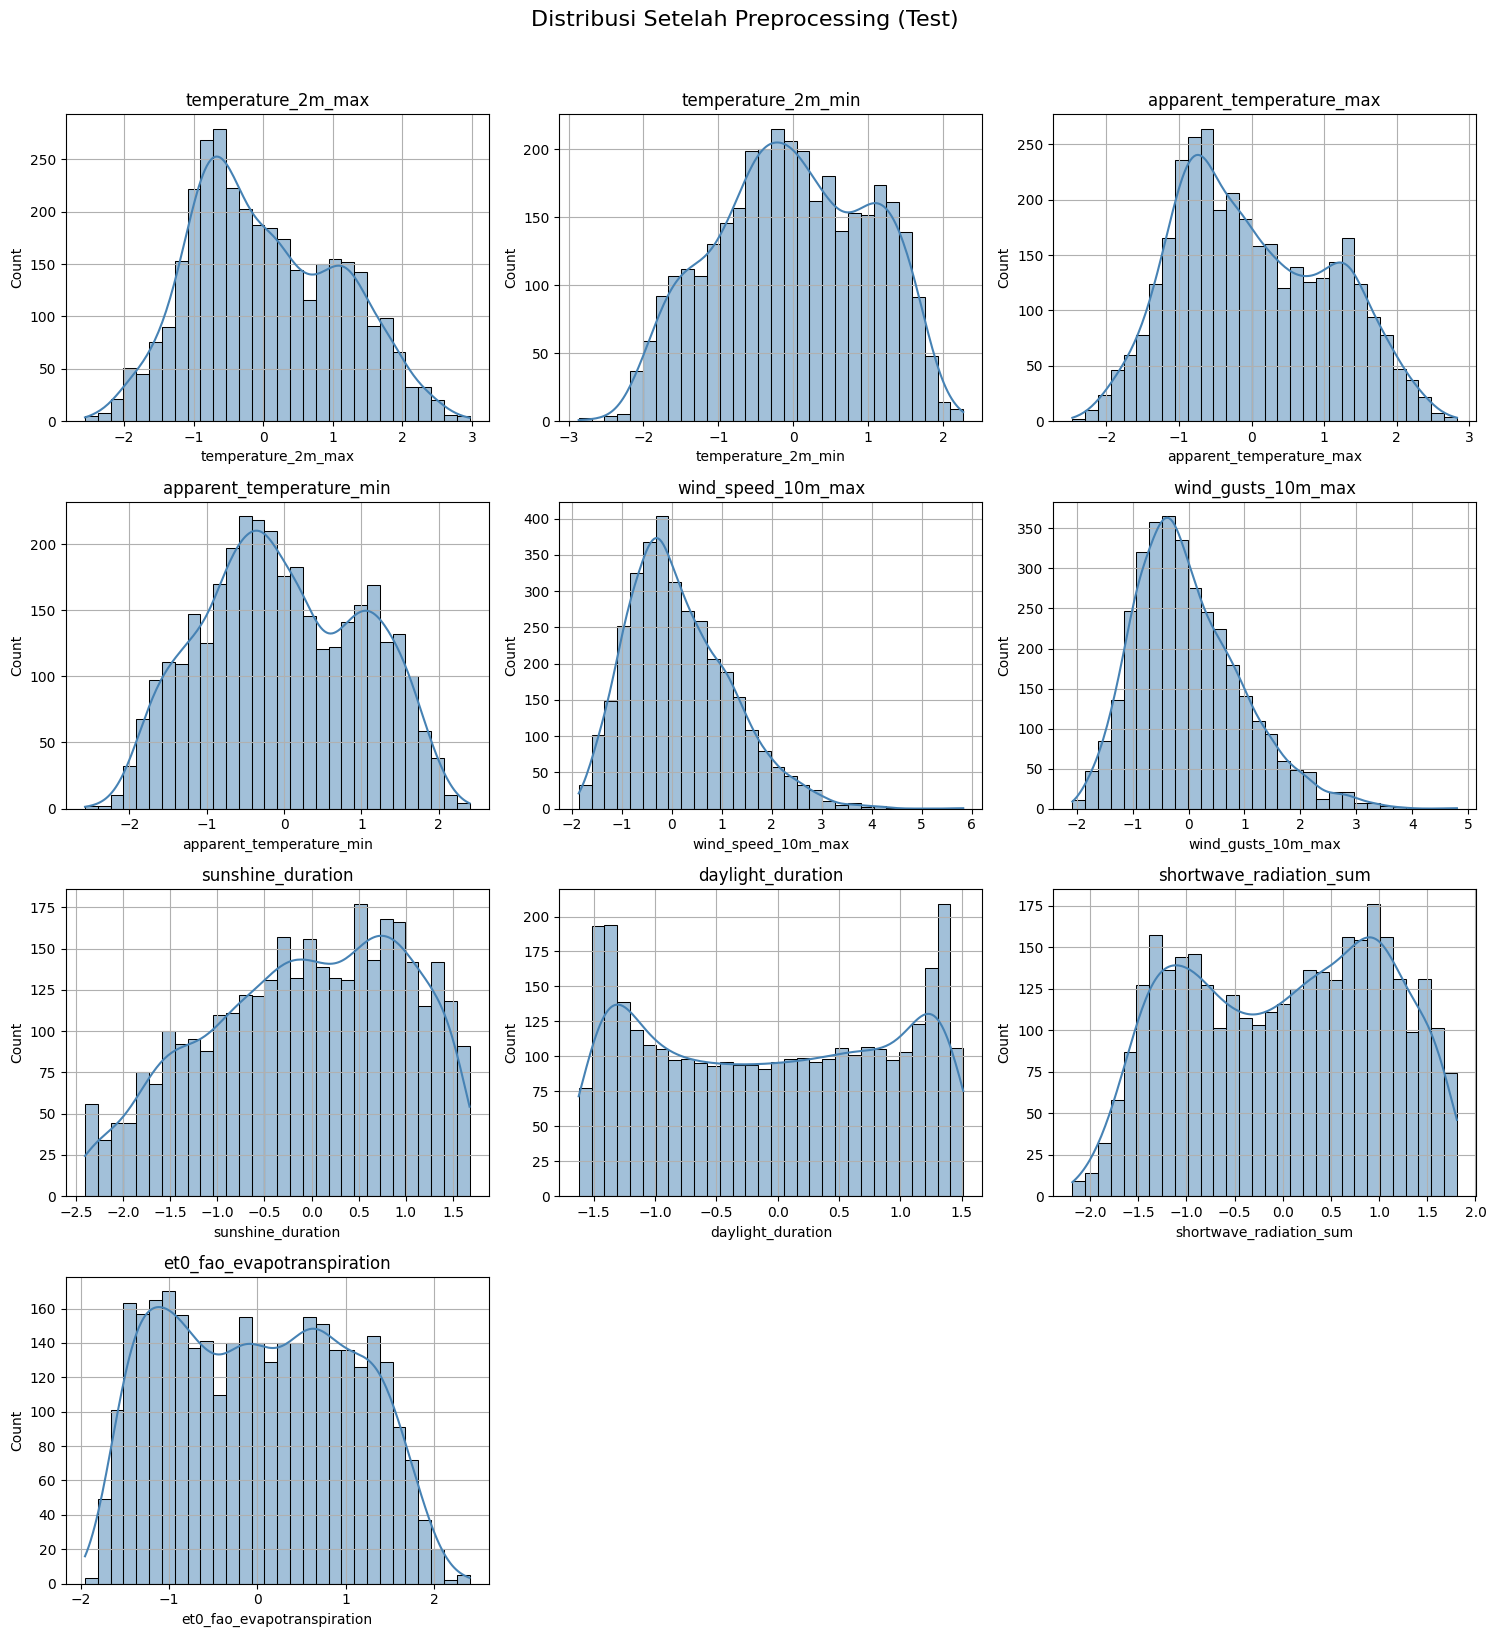

In [33]:
# Fungsi untuk plotting histogram
def plot_distributions(df, title):
    cols = df.columns
    n_cols = 3
    n_rows = (len(cols) + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 5, n_rows * 4))
    plt.suptitle(title, fontsize=16, y=1.02)

    for i, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(df[col], kde=True, bins=30, color='steelblue')
        plt.title(col)
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot hasil preprocessing
plot_distributions(train_transformed, 'Distribusi Setelah Preprocessing (Train)')
plot_distributions(test_transformed, 'Distribusi Setelah Preprocessing (Test)')


In [34]:
from scipy.stats import shapiro

def uji_shapiro(df):
    print("UJI NORMALITAS (Shapiro-Wilk)\n")
    for col in df.columns:
        stat, p = shapiro(df[col])
        status = 'Normal' if p > 0.05 else 'Tidak Normal'
        print(f"{col:30s} | p-value = {p:.5f} | {status}")

# Jalankan untuk hasil preprocessing
print("=== Train ===")
uji_shapiro(train_transformed)

print("\n=== Test ===")
uji_shapiro(test_transformed)


=== Train ===
UJI NORMALITAS (Shapiro-Wilk)

temperature_2m_max             | p-value = 0.00000 | Tidak Normal
temperature_2m_min             | p-value = 0.00000 | Tidak Normal
apparent_temperature_max       | p-value = 0.00000 | Tidak Normal
apparent_temperature_min       | p-value = 0.00000 | Tidak Normal
wind_speed_10m_max             | p-value = 0.00000 | Tidak Normal
wind_gusts_10m_max             | p-value = 0.00000 | Tidak Normal
sunshine_duration              | p-value = 0.00000 | Tidak Normal
daylight_duration              | p-value = 0.00000 | Tidak Normal
shortwave_radiation_sum        | p-value = 0.00000 | Tidak Normal
et0_fao_evapotranspiration     | p-value = 0.00000 | Tidak Normal

=== Test ===
UJI NORMALITAS (Shapiro-Wilk)

temperature_2m_max             | p-value = 0.00000 | Tidak Normal
temperature_2m_min             | p-value = 0.00000 | Tidak Normal
apparent_temperature_max       | p-value = 0.00000 | Tidak Normal
apparent_temperature_min       | p-value = 0.00000 |

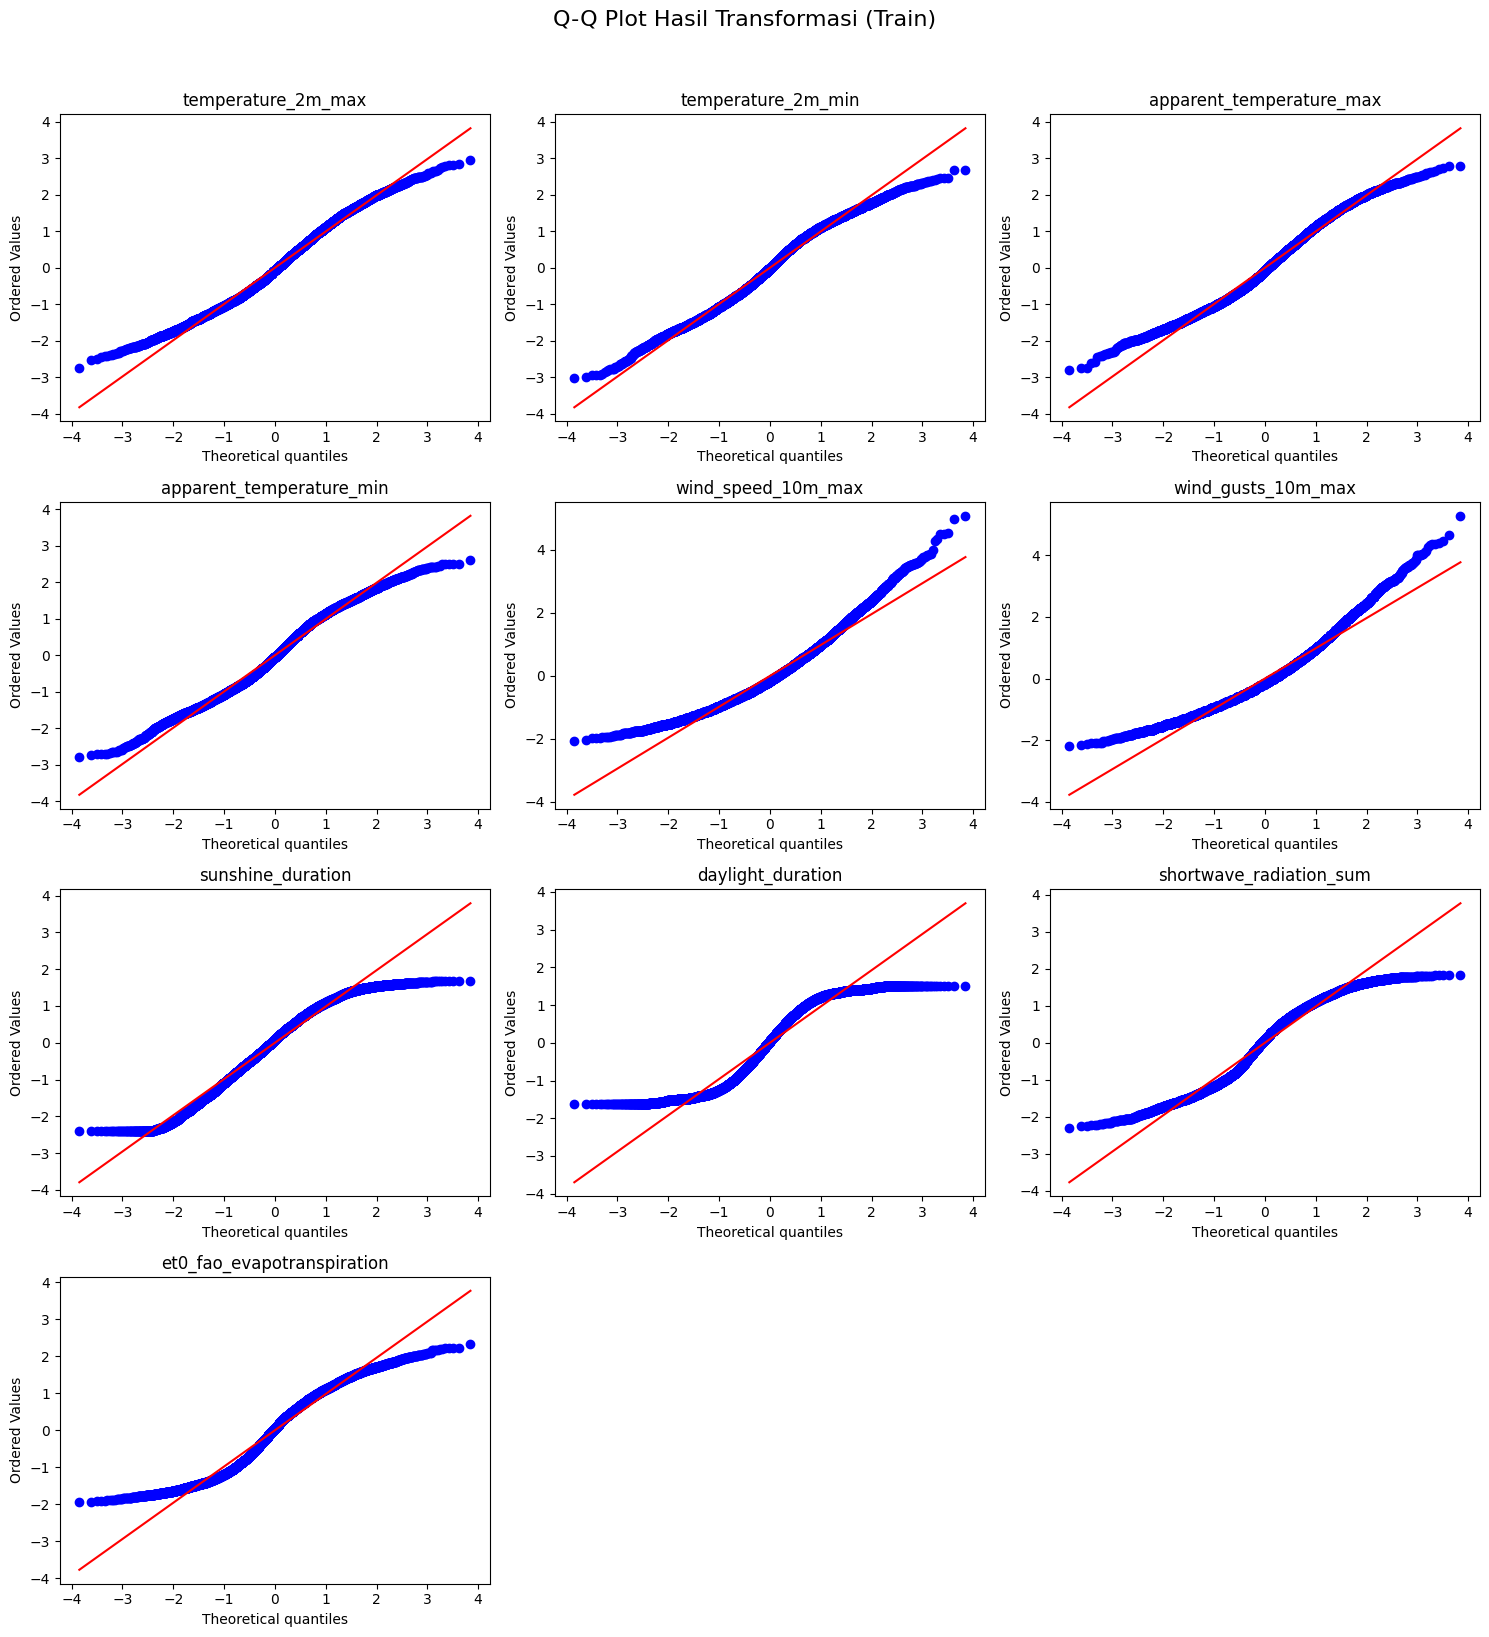

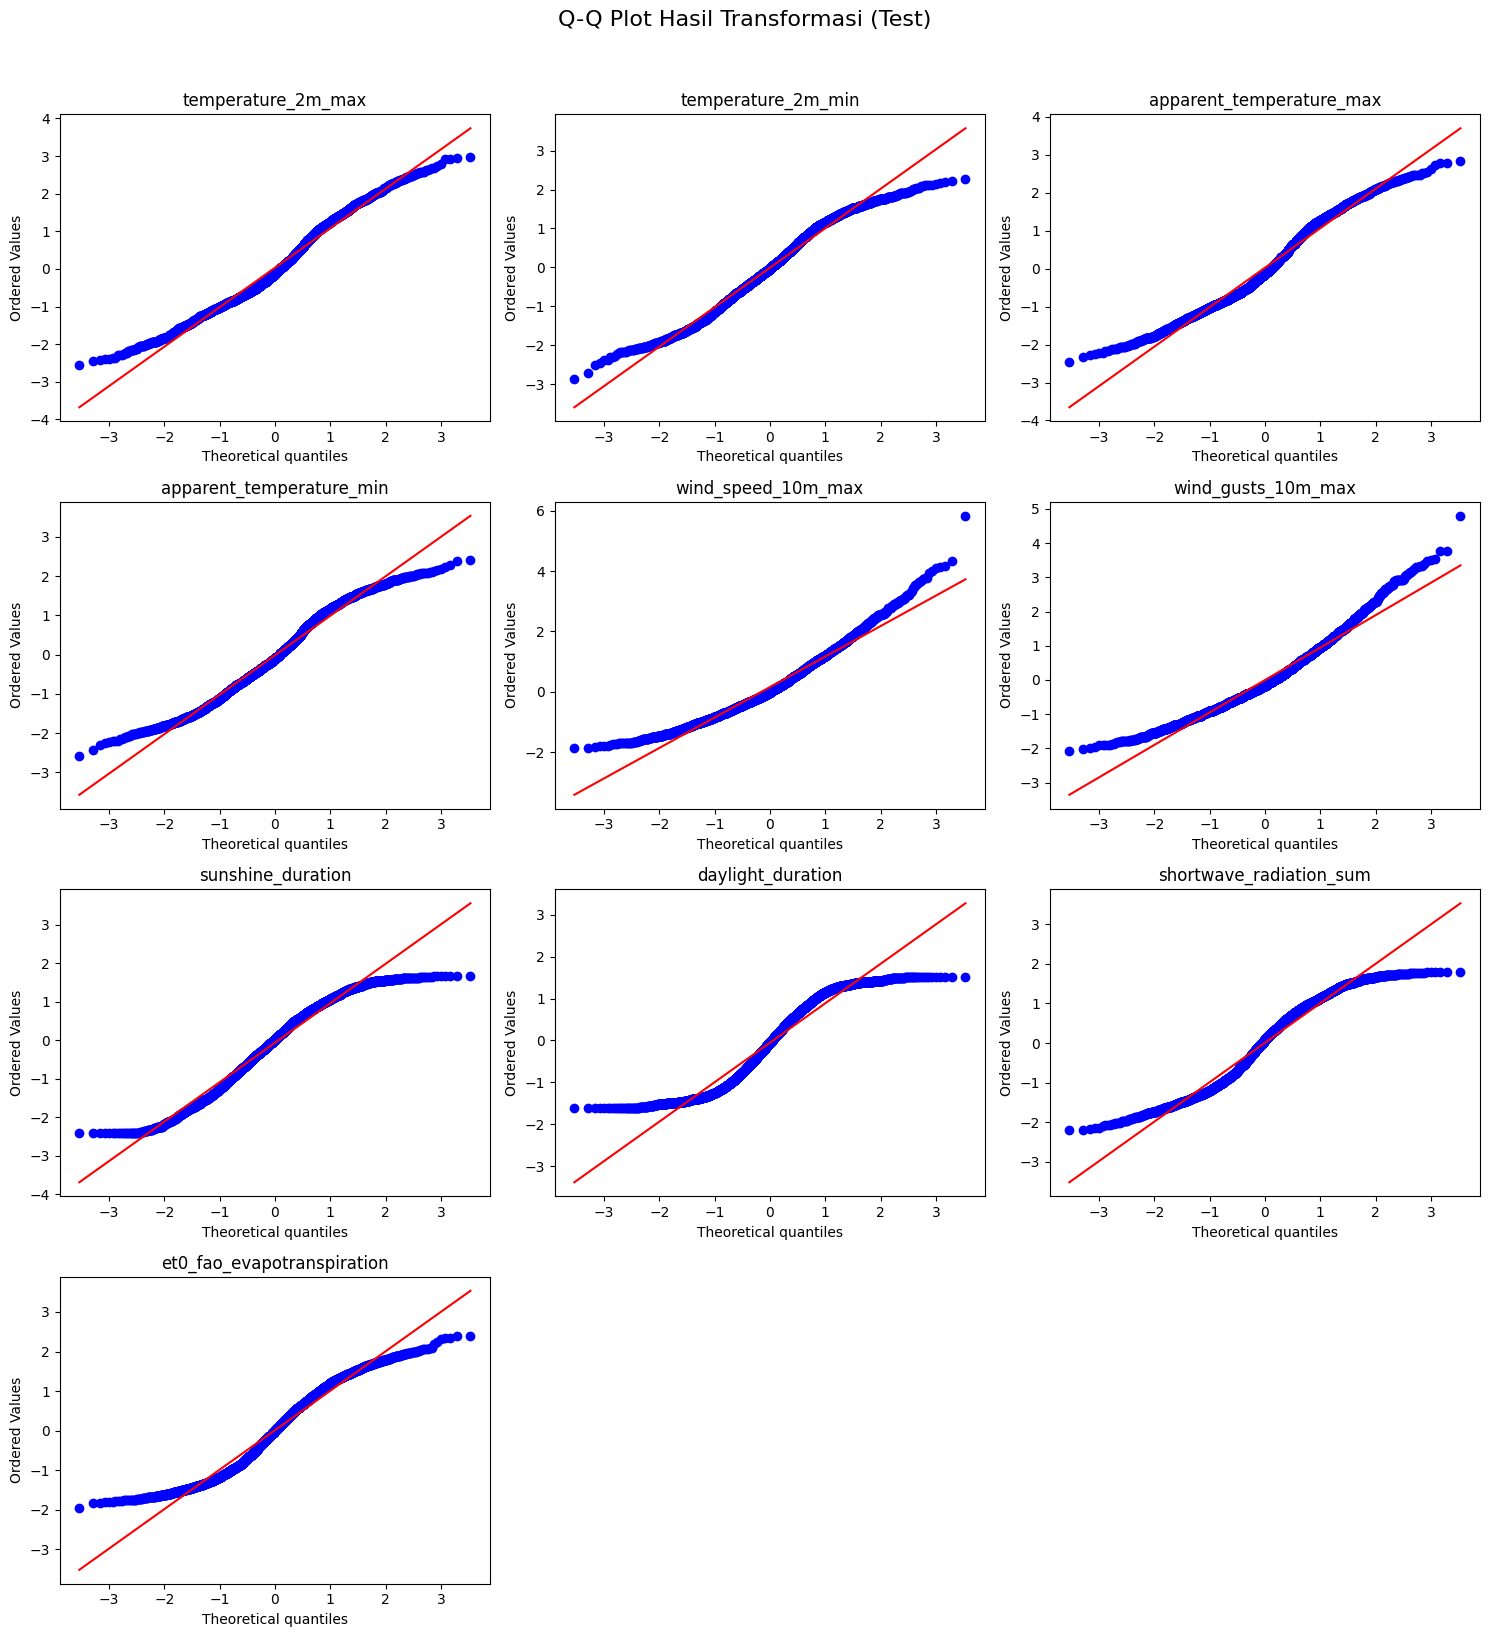

In [35]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def qq_plot(df, title):
    cols = df.columns
    n_cols = 3
    n_rows = (len(cols) + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 5, n_rows * 4))
    plt.suptitle(title, fontsize=16, y=1.02)

    for i, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        stats.probplot(df[col], dist="norm", plot=plt)
        plt.title(col)

    plt.tight_layout()
    plt.show()

# Q-Q plot untuk train dan test
qq_plot(train_transformed, "Q-Q Plot Hasil Transformasi (Train)")
qq_plot(test_transformed, "Q-Q Plot Hasil Transformasi (Test)")


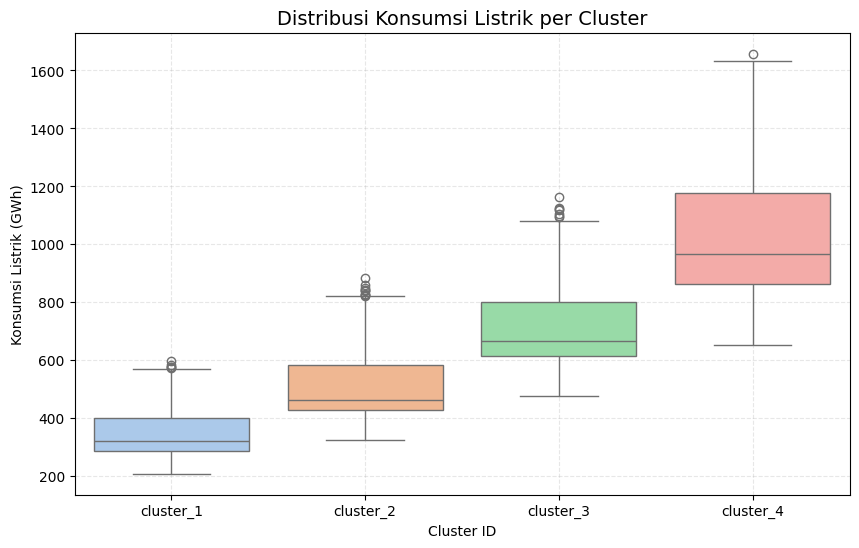

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='cluster_id', y='electricity_consumption', palette='pastel')
plt.title('Distribusi Konsumsi Listrik per Cluster', fontsize=14)
plt.xlabel('Cluster ID')
plt.ylabel('Konsumsi Listrik (GWh)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


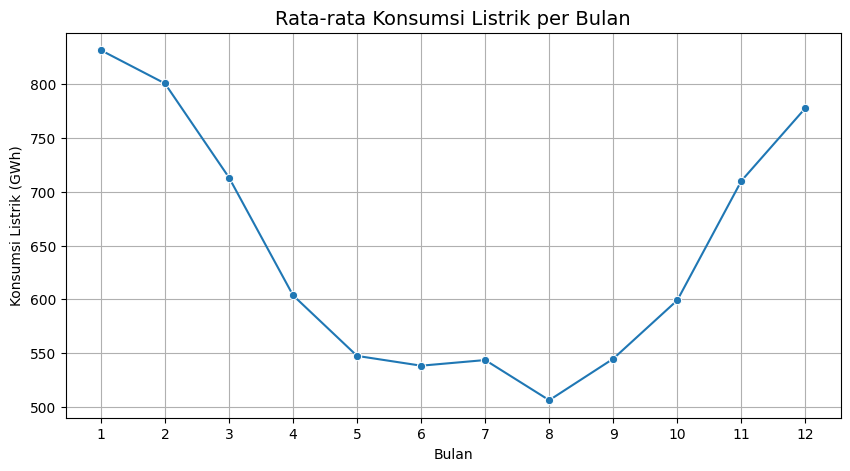

In [38]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=train, x='month', y='electricity_consumption', estimator='mean', ci=None, marker='o')
plt.title('Rata-rata Konsumsi Listrik per Bulan', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Konsumsi Listrik (GWh)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

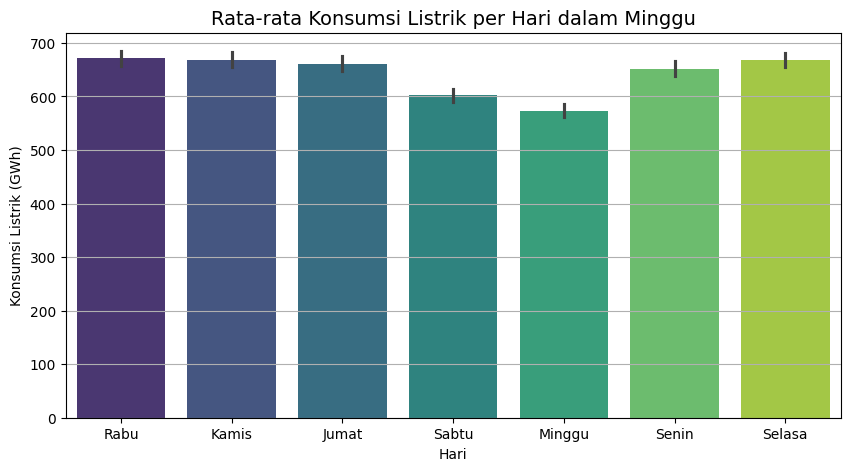

In [40]:
hari_dict = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
train['hari'] = train['dayofweek'].map(hari_dict)

plt.figure(figsize=(10, 5))
sns.barplot(data=train, x='hari', y='electricity_consumption', estimator='mean', palette='viridis')
plt.title('Rata-rata Konsumsi Listrik per Hari dalam Minggu', fontsize=14)
plt.xlabel('Hari')
plt.ylabel('Konsumsi Listrik (GWh)')
plt.grid(True, axis='y')
plt.show()

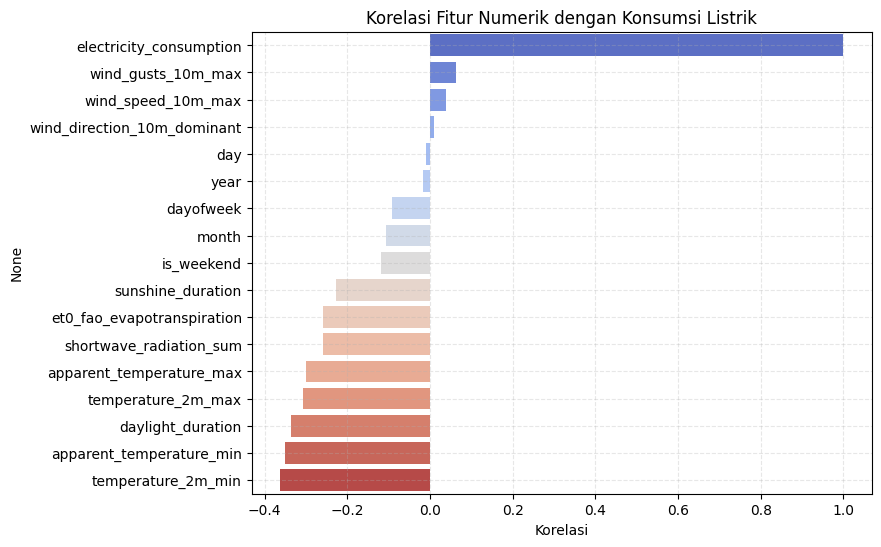

In [42]:
numeric_cols = train.select_dtypes(include='number')

# Hitung korelasi terhadap target
cor_target = numeric_cols.corr()['electricity_consumption'].sort_values(ascending=False)

# Visualisasi barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=cor_target.values, y=cor_target.index, palette='coolwarm')
plt.title('Korelasi Fitur Numerik dengan Konsumsi Listrik')
plt.xlabel('Korelasi')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


# 04 Modeling

In [45]:
# Fitur waktu
time_cols = ['year', 'month', 'day', 'dayofweek', 'is_weekend']

# Gabungkan semua fitur
X_train_full = pd.concat([train_transformed.reset_index(drop=True), train[time_cols].reset_index(drop=True)], axis=1)
X_test_full = pd.concat([test_transformed.reset_index(drop=True), test[time_cols].reset_index(drop=True)], axis=1)

X = X_train_full.copy()
y = train['electricity_consumption']
X_test = X_test_full.copy()


Tuning/CV for: Linear Regression
Tuning/CV for: Random Forest
Tuning/CV for: XGBoost
Tuning/CV for: Gradient Boosting
Tuning/CV for: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2609
[LightGBM] [Info] Number of data points in the train set: 11688, number of used features: 15
[LightGBM] [Info] Start training from score 642.313328


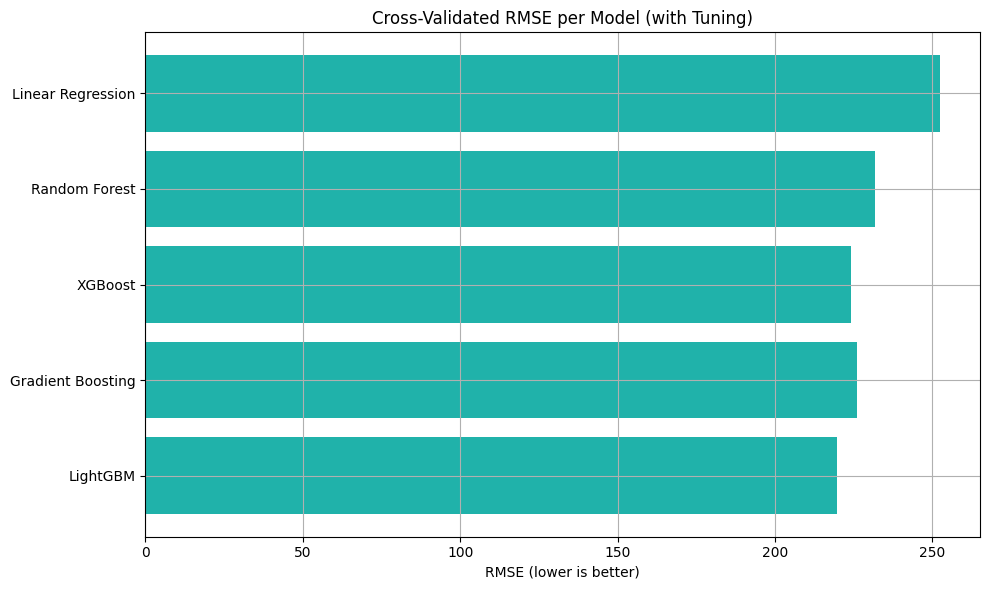

In [49]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Param grid (bisa disesuaikan)
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [-1, 5]
    }
}

# Base models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

# CV setup
cv_results = []
best_models = {}

for name, model in models.items():
    print(f"Tuning/CV for: {name}")
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
        grid.fit(X, y)
        best_model = grid.best_estimator_
        best_rmse = -grid.best_score_
        best_models[name] = best_model
    else:
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        fold_rmse = []
        for train_idx, val_idx in kf.split(X):
            X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
            y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
            model.fit(X_train_cv, y_train_cv)
            y_pred_val = model.predict(X_val_cv)
            score = rmse(y_val_cv, y_pred_val)
            fold_rmse.append(score)
        best_model = model
        best_rmse = np.mean(fold_rmse)
        best_models[name] = best_model

    cv_results.append((name, best_rmse))

# Plot RMSE per model
model_names, rmse_scores = zip(*cv_results)
plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_scores, color='lightseagreen')
plt.xlabel("RMSE (lower is better)")
plt.title("Cross-Validated RMSE per Model (with Tuning)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

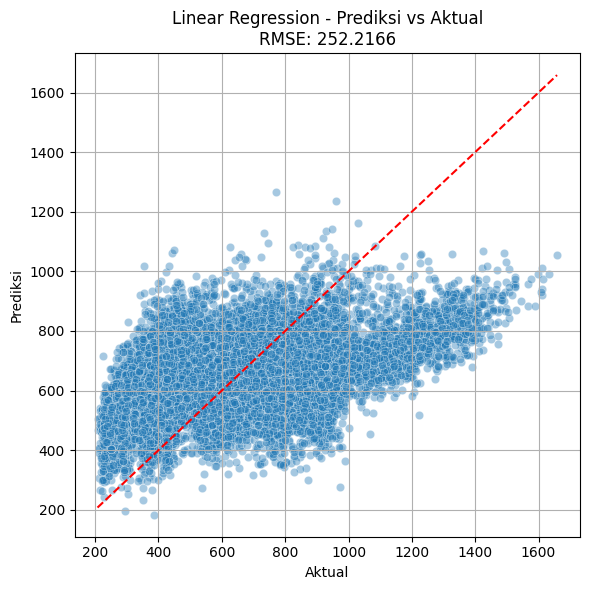

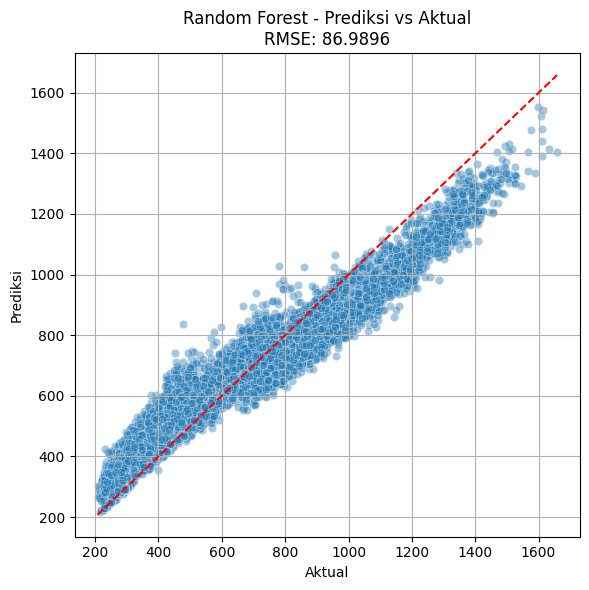

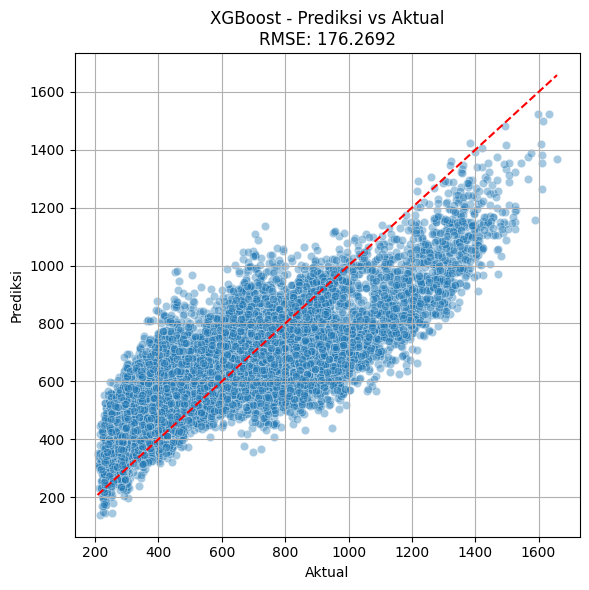

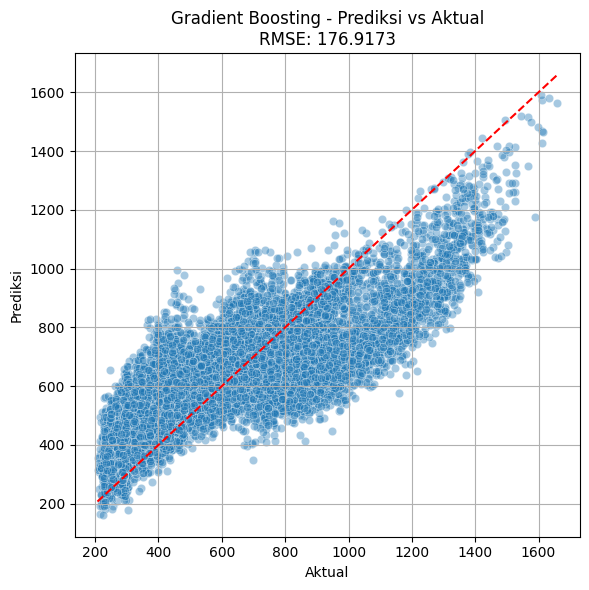

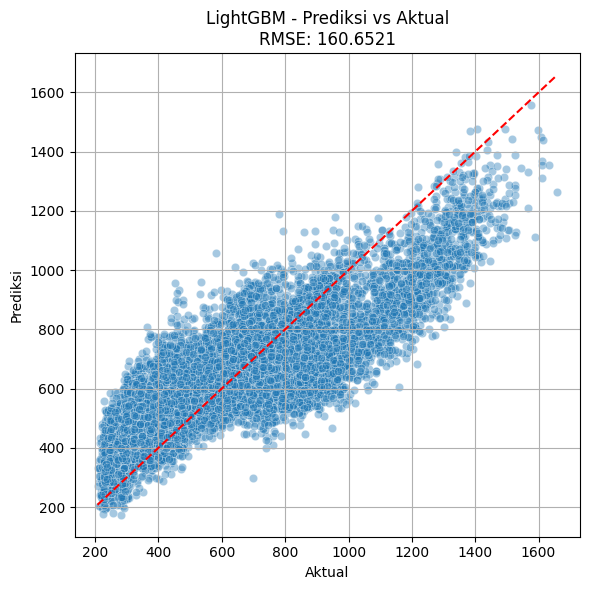

In [55]:
def plot_actual_vs_pred(y_true, y_pred, title_base):
    error = rmse(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.xlabel('Aktual')
    plt.ylabel('Prediksi')
    plt.title(f"{title_base}\nRMSE: {error:.4f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 💡 Plot aktual vs prediksi untuk setiap model
for name, model in best_models.items():
    y_pred = model.predict(X)
    plot_actual_vs_pred(y, y_pred, f'{name} - Prediksi vs Aktual')

In [57]:
rf_best = best_models['Random Forest']

# Prediksi data test
y_test_pred_rf = rf_best.predict(X_test_full)

# Simpan ke file submission
submission = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': y_test_pred_rf
})
submission

,ID,electricity_consumption
0,cluster_1_2022-01-01,492.590360
1,cluster_2_2022-01-01,663.303285
2,cluster_3_2022-01-01,697.814730
3,cluster_4_2022-01-01,749.881620
4,cluster_1_2022-01-02,473.370385
...,...,...
3395,cluster_4_2024-04-28,454.506575
3396,cluster_1_2024-04-29,598.593360
3397,cluster_2_2024-04-29,640.491590
3398,cluster_3_2024-04-29,618.987425


In [58]:
submission.to_csv('submission.csv', index=False)
print("File submission.csv berhasil dibuat.")

File submission.csv berhasil dibuat.
